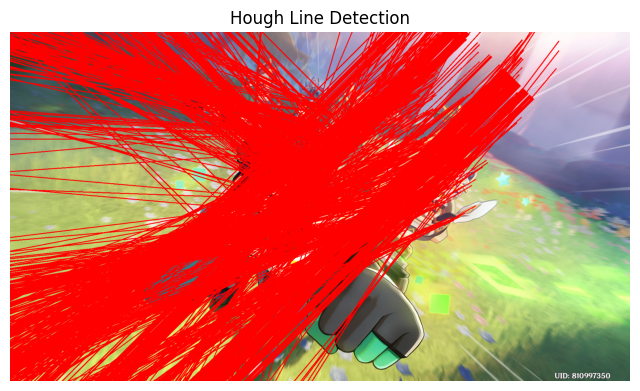

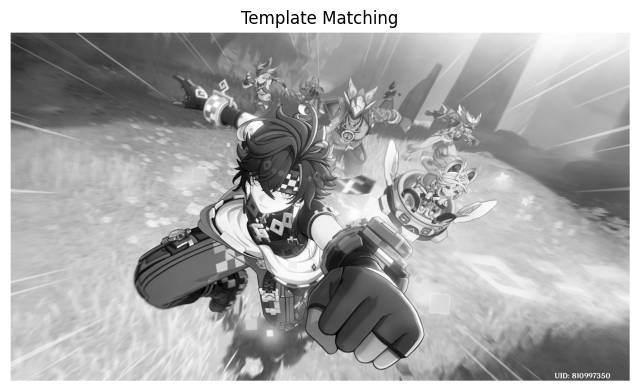

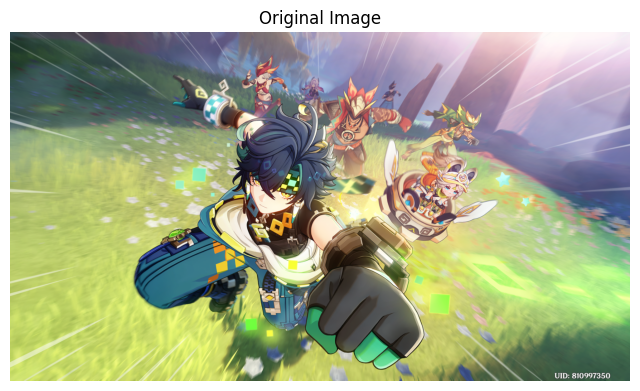

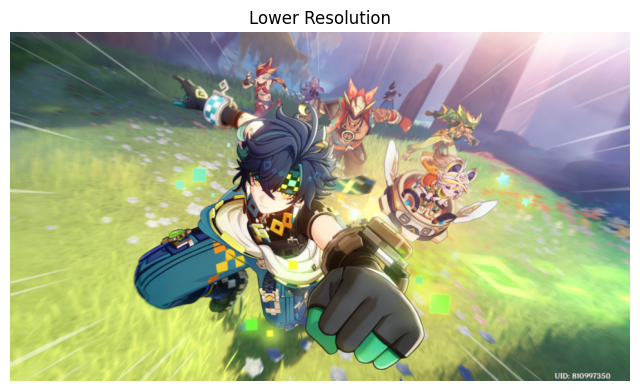

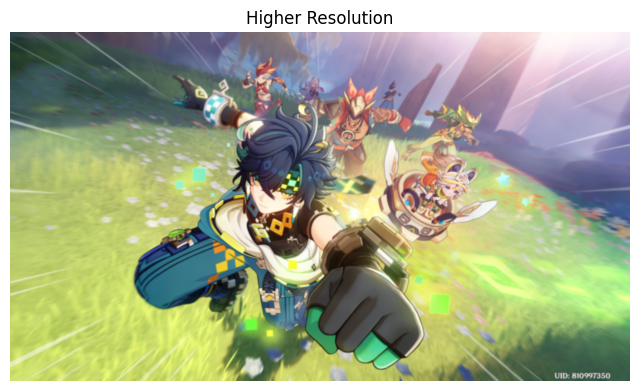

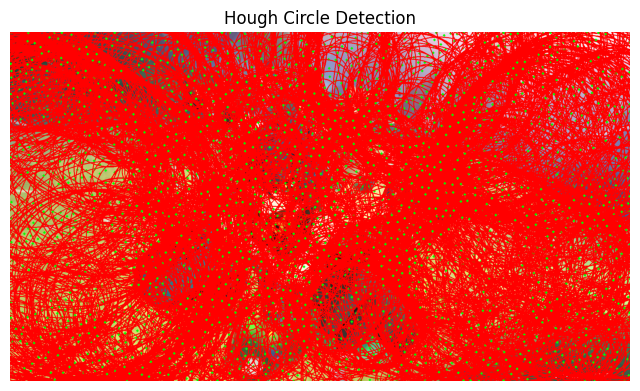

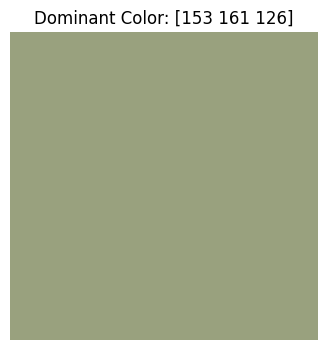

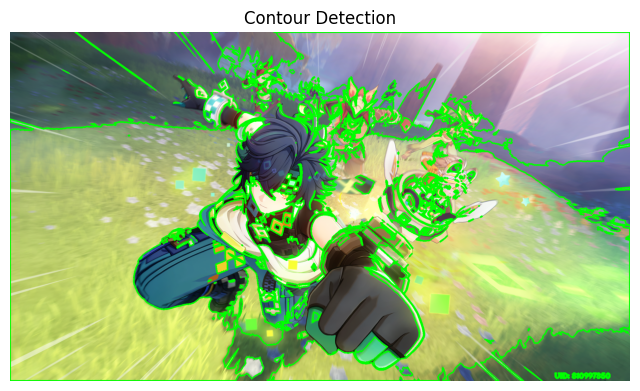

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk menampilkan gambar
def display_image(title, image):
    plt.figure(figsize=(8, 6))
    plt.title(title)
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

# 1. Ekstraksi Garis dengan Hough Transform
def hough_line_detection(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi/180, 200)

    for rho, theta in lines[:, 0]:
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv2.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

    display_image('Hough Line Detection', cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

# Masukkan path gambar
image_path = '/content/sample_data/sample1.png'
hough_line_detection(image_path)



# 2. Template Matching untuk Deteksi Objek
def template_matching(image_path, template_path):
    img = cv2.imread(image_path, 0)
    template = cv2.imread(template_path, 0)
    w, h = template.shape[::-1]
    res = cv2.matchTemplate(img, template, cv2.TM_CCOEFF_NORMED)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img, top_left, bottom_right, 255, 2)

    display_image('Template Matching', img)

# Gambar utama yang sudah diproses di hough_line_detection
image_path = '/content/sample_data/sample1.png'

# Gambar template yang ingin dicocokkan (misalnya gambar logo atau objek kecil)
template_path = '/content/sample_data/sample2.png'

# Memanggil fungsi template matching
template_matching(image_path, template_path)



# 3. Pembuatan Pyramid Gambar
def pyramid_image(image_path):
    img = cv2.imread(image_path)  # Membaca gambar berdasarkan path yang diberikan
    lower_reso = cv2.pyrDown(img)  # Membuat resolusi lebih rendah
    higher_reso = cv2.pyrUp(lower_reso)  # Membuat resolusi lebih tinggi

    # Menampilkan gambar asli, resolusi lebih rendah, dan resolusi lebih tinggi
    display_image('Original Image', cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    display_image('Lower Resolution', cv2.cvtColor(lower_reso, cv2.COLOR_BGR2RGB))
    display_image('Higher Resolution', cv2.cvtColor(higher_reso, cv2.COLOR_BGR2RGB))

# Fungsi pemanggilan
# Gantilah 'path_to_image.jpg' dengan path gambar yang sesuai
image_path = '/content/sample_data/sample1.png'
pyramid_image(image_path)  # Memanggil fungsi dengan path gambar

# 4. Deteksi Lingkaran Menggunakan Hough Transform
def hough_circle_detection(image_path):
    img = cv2.imread(image_path, 0)
    img_color = cv2.cvtColor(cv2.imread(image_path), cv2.COLOR_BGR2RGB)
    circles = cv2.HoughCircles(img, cv2.HOUGH_GRADIENT, 1, 20, param1=50, param2=30, minRadius=0, maxRadius=0)

    if circles is not None:
        circles = np.uint16(np.around(circles))
        for i in circles[0, :]:
            cv2.circle(img_color, (i[0], i[1]), i[2], (255, 0, 0), 2)
            cv2.circle(img_color, (i[0], i[1]), 2, (0, 255, 0), 3)

    display_image('Hough Circle Detection', img_color)

image_path = '/content/sample_data/sample1.png'  # Ganti dengan path gambar
hough_circle_detection(image_path)  # Memanggil fungsi Hough Circle Detection



# 5. Ekstraksi Warna Dominan pada Gambar
def extract_dominant_color(image_path):
    img = cv2.imread(image_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    pixels = img.reshape(-1, 3)
    pixels = np.float32(pixels)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 100, 0.2)
    k = 1
    _, labels, centers = cv2.kmeans(pixels, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
    dominant_color = centers[0].astype(int)

    plt.figure(figsize=(6, 4))
    plt.title(f'Dominant Color: {dominant_color}')
    plt.imshow([[dominant_color / 255]])
    plt.axis('off')
    plt.show()

image_path = '/content/sample_data/sample1.png'  # Ganti dengan path gambar
extract_dominant_color(image_path)  # Memanggil fungsi Extract Dominant Color



# 6. Deteksi Kontur pada Gambar
def contour_detection(image_path):
    img = cv2.imread(image_path)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, thresh = cv2.threshold(gray, 127, 255, cv2.THRESH_BINARY)
    contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    cv2.drawContours(img, contours, -1, (0, 255, 0), 3)

    display_image('Contour Detection', cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

image_path = '/content/sample_data/sample1.png'  # Ganti dengan path gambar
contour_detection(image_path)  # Memanggil fungsi Contour Detection